In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [10]:
train = pd.read_csv("train.csv") #load the data from the system

In [11]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploring the data

### Categorical Variables

<AxesSubplot:xlabel='Sex', ylabel='count'>

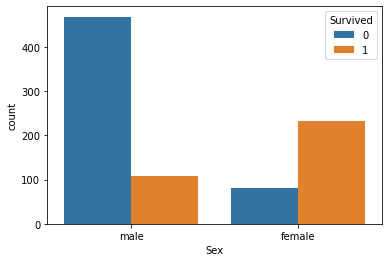

In [13]:
sns.countplot(x="Sex",hue="Survived",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

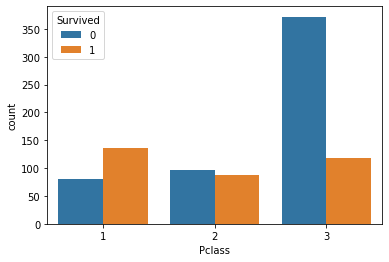

In [14]:
sns.countplot(x="Pclass",hue="Survived",data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

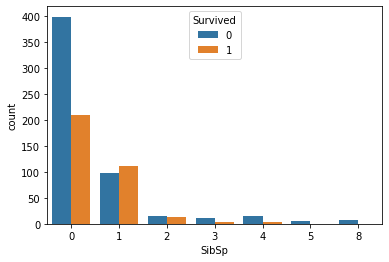

In [15]:
sns.countplot(x="SibSp",hue="Survived",data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

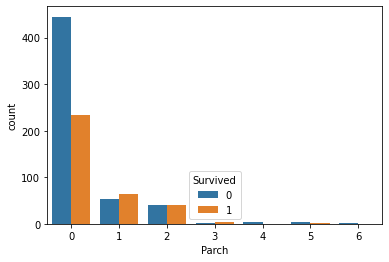

In [16]:
sns.countplot(x="Parch",hue="Survived",data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

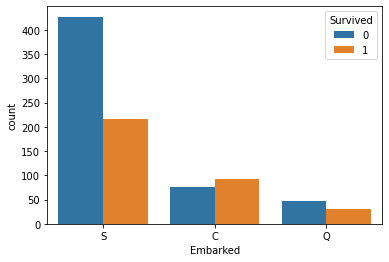

In [17]:
sns.countplot(x="Embarked",hue="Survived",data=train)

In [18]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train, index = 'Survived',aggfunc ='count'))

          Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  Sex  \
Survived                                                                      
0         424     68       549   549   549    549          549     549  549   
1         290    136       340   342   342    342          342     342  342   

          SibSp  Ticket  
Survived                 
0           549     549  
1           342     342  


### Numerical Variables 

<AxesSubplot:xlabel='Age'>

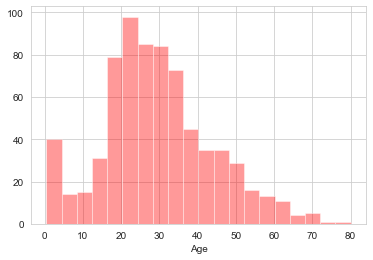

In [19]:
sns.set_style('whitegrid')
sns.distplot(train['Age'], kde = False, color ='red')

<AxesSubplot:xlabel='Fare'>

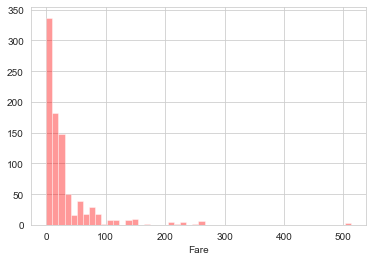

In [20]:
sns.set_style('whitegrid')
sns.distplot(train['Fare'], kde = False, color ='red')

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

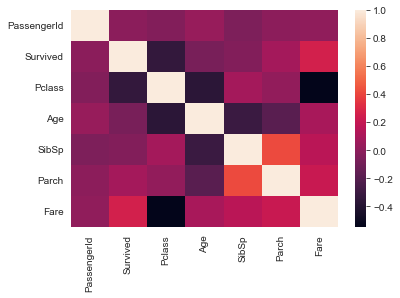

In [21]:
print(train.corr())
sns.heatmap(train.corr())

In [22]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# Combining the test and train files

In [23]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combined = pd.concat([train.drop('Survived',axis=1),test])

<AxesSubplot:>

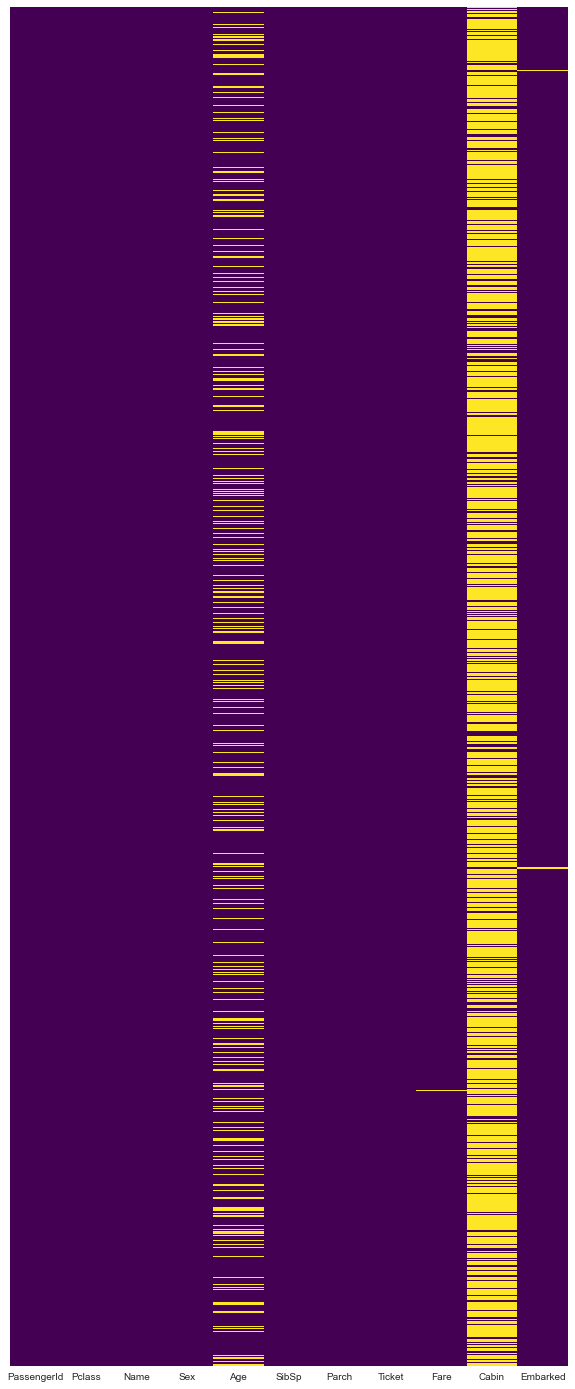

In [24]:
#For iPython
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,25))
sns.heatmap(combined.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [25]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [26]:
# Imputing the missing age values
train['Age'].fillna(train['Age'].median(),inplace=True)

In [27]:
# Imputing the missing embarked values
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

In [28]:
#Creating a dictionary to convert Passenger Class from 1,2,3 to 1st,2nd,3rd.
d = {1:'1st',2:'2nd',3:'3rd'}

In [29]:
#Mapping the column based on the dictionary
train['Pclass']=train['Pclass'].map(d)

In [30]:
# Dropping Unnecessary Columns
train.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

In [31]:
# Getting Dummies of Categorical Variables
categorical_vars = train[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(categorical_vars,drop_first=True)

In [32]:
#Dropping the Original Categorical Variables to avoid duplicates
train = train.drop(['Pclass','Sex','Embarked'],axis=1)

In [33]:
#concat the new dummy variables
train = pd.concat([train,dummies],axis=1)

In [34]:
#Check the clean version of the train data.
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


# Train Test Split

In [35]:
# Splitting Features and Label
y = train['Survived']
X = train.drop(['Survived'],1)

#Using Train Test Split from Sklearn to Split Our Train Dataset into Train and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Building

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [37]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.792      0.824      0.784      0.67741935 0.80645161]
0.7767741935483871


In [38]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train)
print(cv)
print(cv.mean())

[0.792      0.816      0.808      0.67741935 0.83064516]
0.7848129032258064


In [39]:
dt = tree.DecisionTreeClassifier
print(cv)
print(cv.mean())

[0.792      0.816      0.808      0.67741935 0.83064516]
0.7848129032258064


In [40]:
knn = KNeighborsClassifier()
print(cv)
print(cv.mean())

[0.792      0.816      0.808      0.67741935 0.83064516]
0.7848129032258064


In [41]:
rf = RandomForestClassifier(random_state = 1)
print(cv)
print(cv.mean())

[0.792      0.816      0.808      0.67741935 0.83064516]
0.7848129032258064


In [42]:
svc = SVC(probability = True)
print(cv)
print(cv.mean())

[0.792      0.816      0.808      0.67741935 0.83064516]
0.7848129032258064


In [43]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [44]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.856      0.816      0.7016129  0.80645161]
0.7960129032258065


# Gradient Boosting model and train

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Confusion Matrix and Classification Reports

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[139  23]
 [ 25  81]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       162
           1       0.78      0.76      0.77       106

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



### Cleaning the test dataset

In [47]:
# Input the missing values for age and fare
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [48]:
# Pclass dictionary
d = {1:'1st',2:'2nd',3:'3rd'}
test['Pclass']=test['Pclass'].map(d)
ids = test[['PassengerId']]# Passenger Ids

In [49]:
# Drop Unnecessary Columns
test.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

In [50]:
# Get dummies of categorical variables
categorical_vars = test[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(categorical_vars,drop_first=True)

In [51]:
# Drop the original categorical variables and concat new dummy variables
test = test.drop(['Pclass','Sex','Embarked'],axis=1)
test = pd.concat([test,dummies],axis=1)
#test.head()

# Prediction File

In [52]:
preds = model.predict(test)
results = ids.assign(Survived=preds)
results.to_csv('titanic_submission.csv',index=False)